In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score,classification_report,confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima=pd.read_csv('diabetes.csv', header=None, names=col_names,skiprows=1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
pima.label.value_counts()

label
0    500
1    268
Name: count, dtype: int64

In [4]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


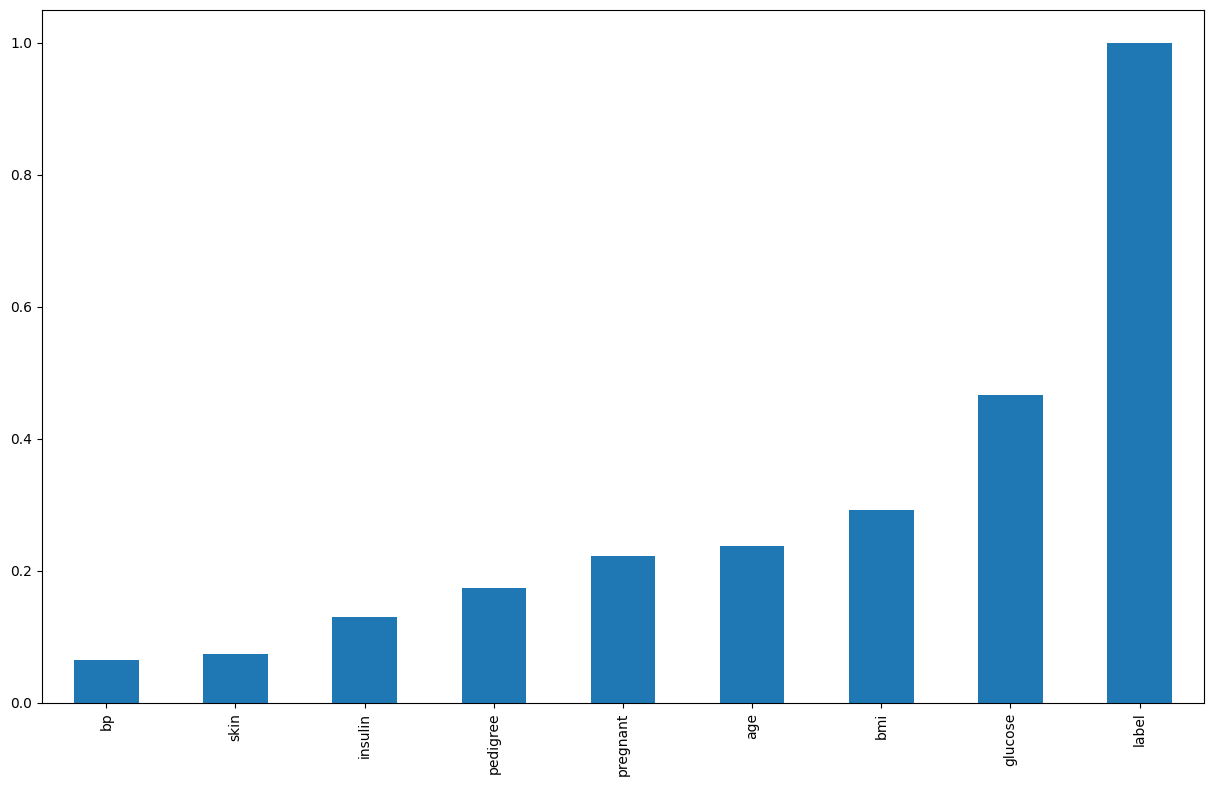

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,9))
pima.corr()['label'].sort_values(ascending=True).plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

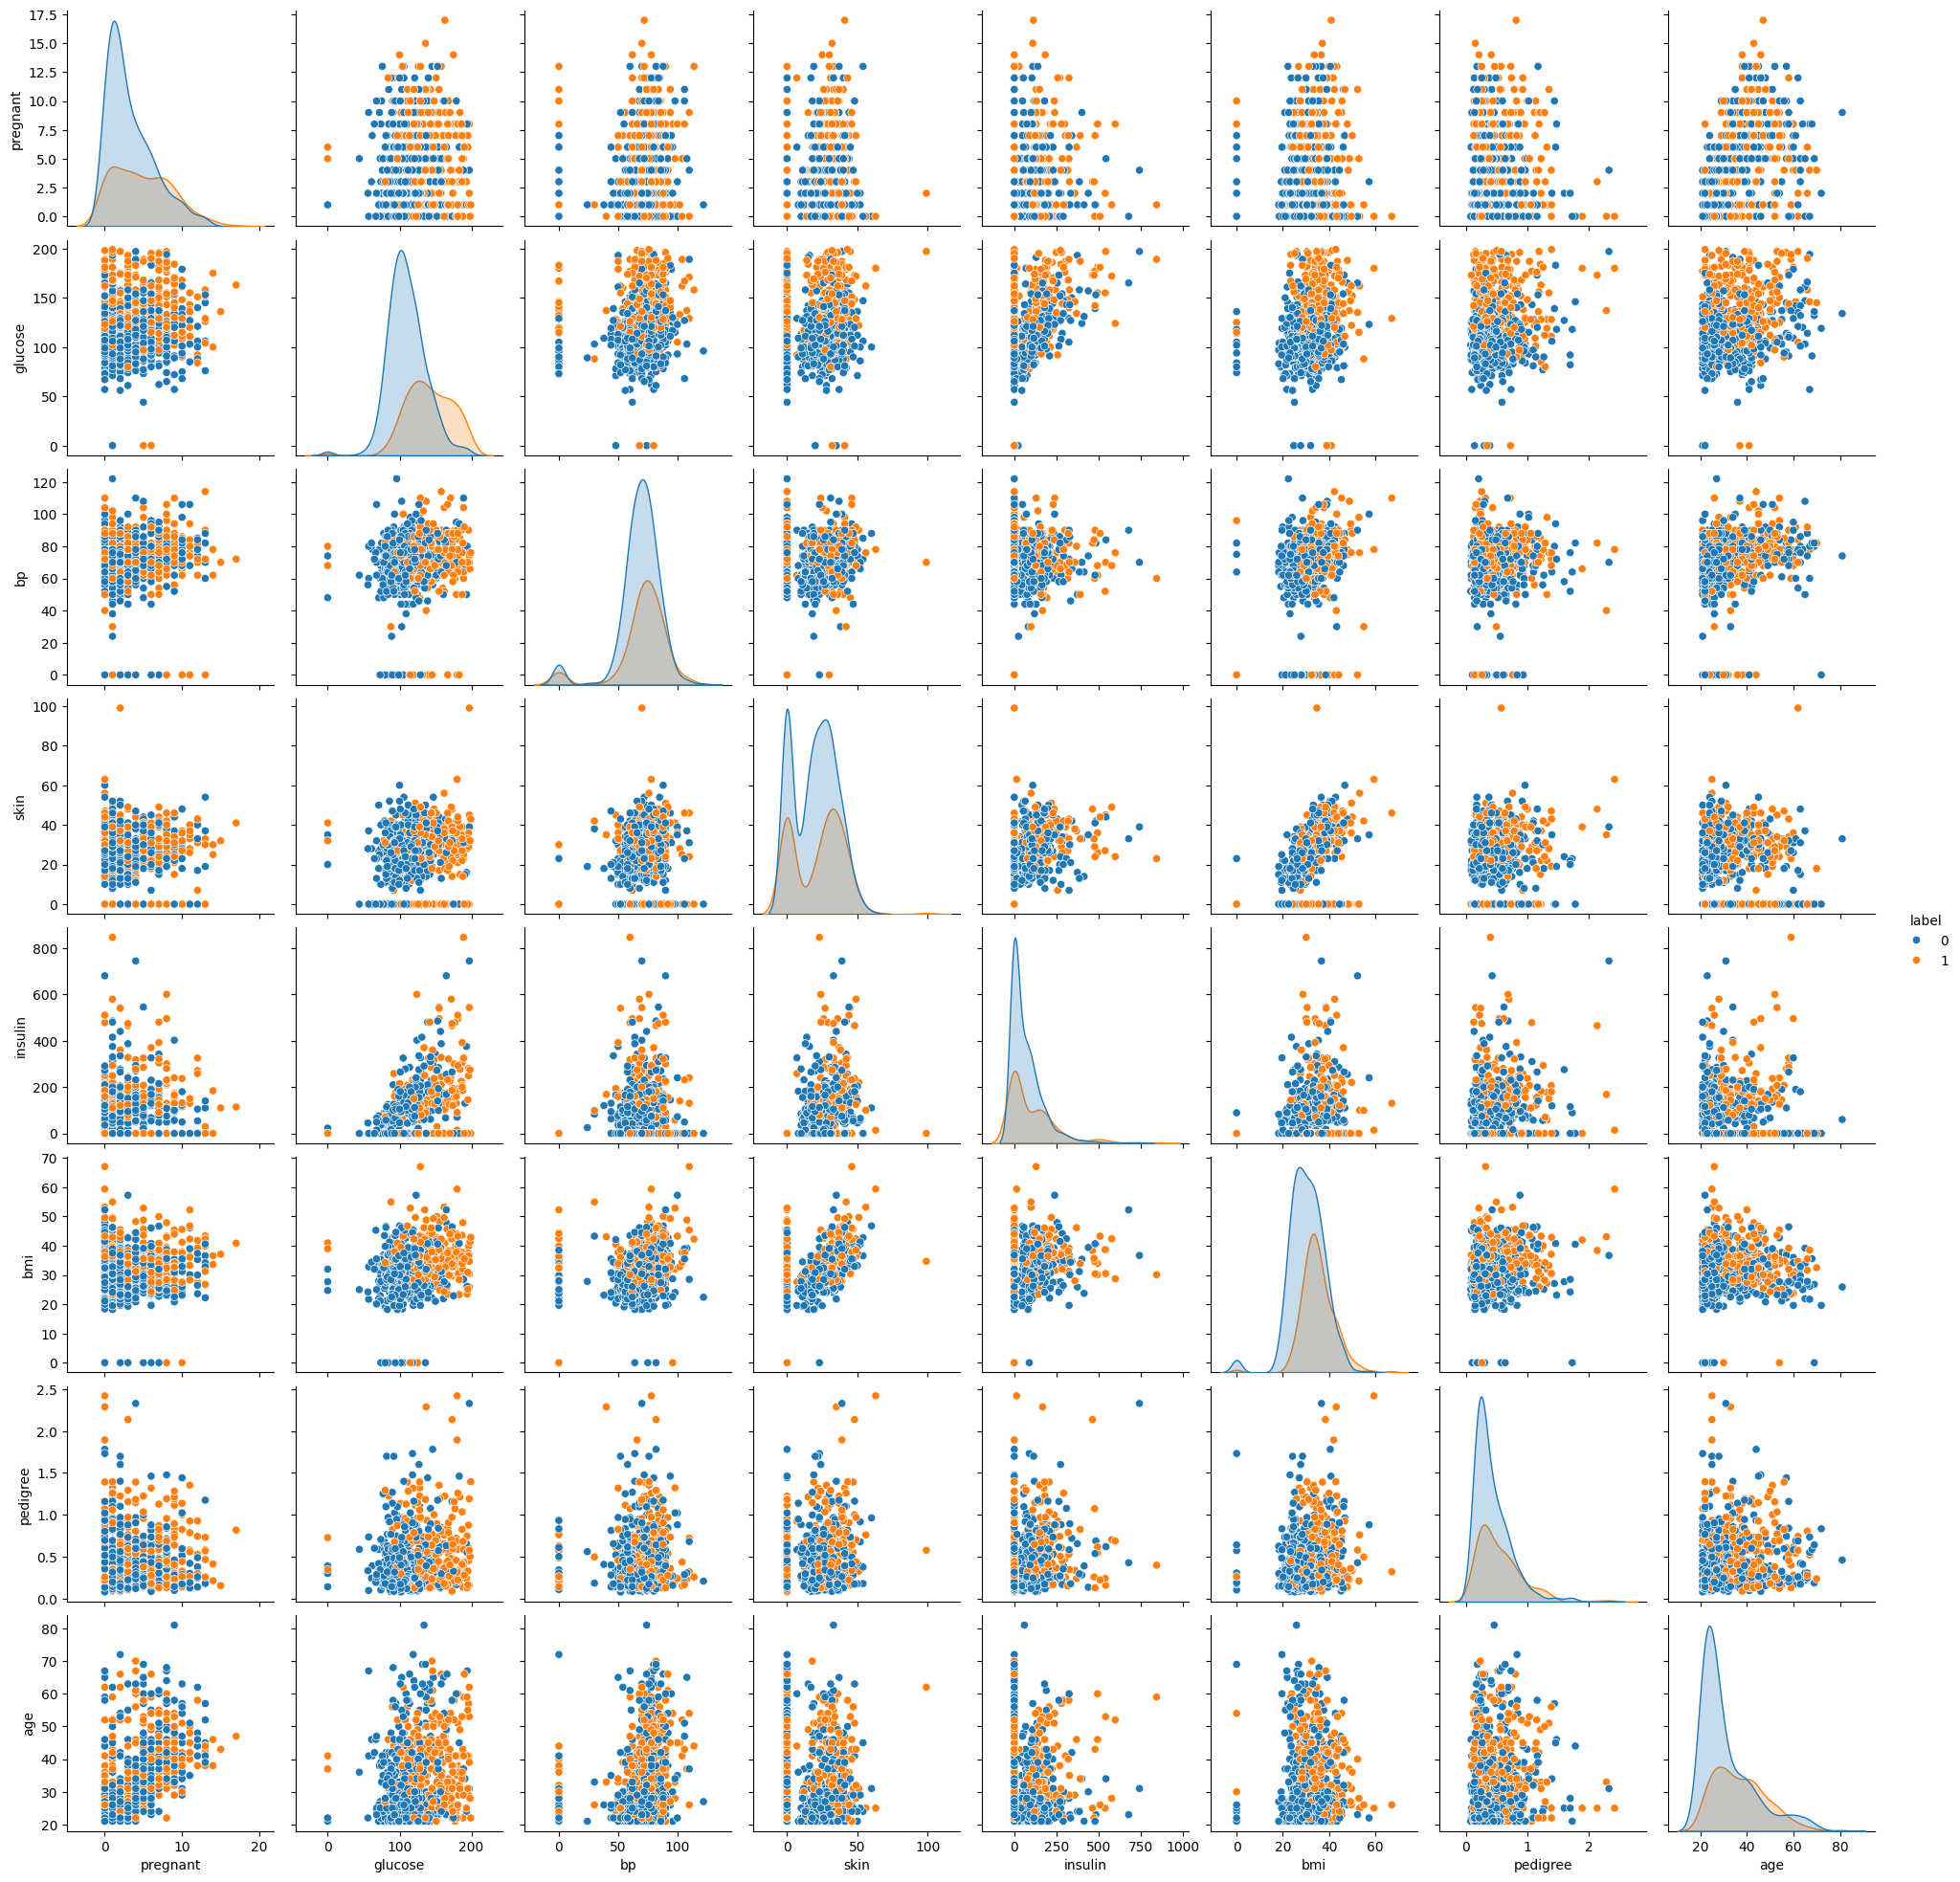

In [6]:
import seaborn as sns

sns.pairplot(data=pima,hue='label')
plt.show

In [7]:
#split dataset in features and target variable
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
#X = pima[feature_cols] # Features
X = pima.drop('label',axis=1)
y = pima.label # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


<Figure size 700x700 with 0 Axes>

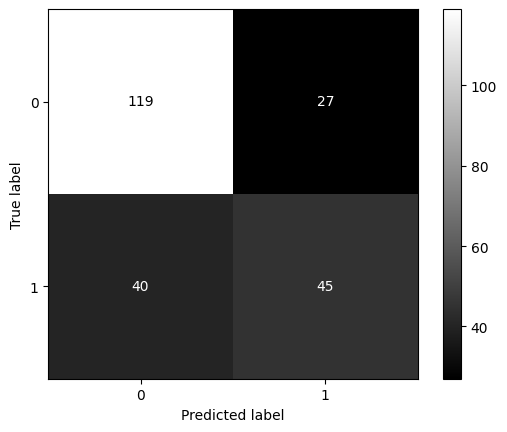

In [11]:
#Matriz de confusion
fig = plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot(cmap='gray')
plt.show()

In [12]:
#Reporte de metricas
predicciones=clf.predict(X_test).reshape(-1,1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.70      0.71      0.70       231



!pip install fraphviz

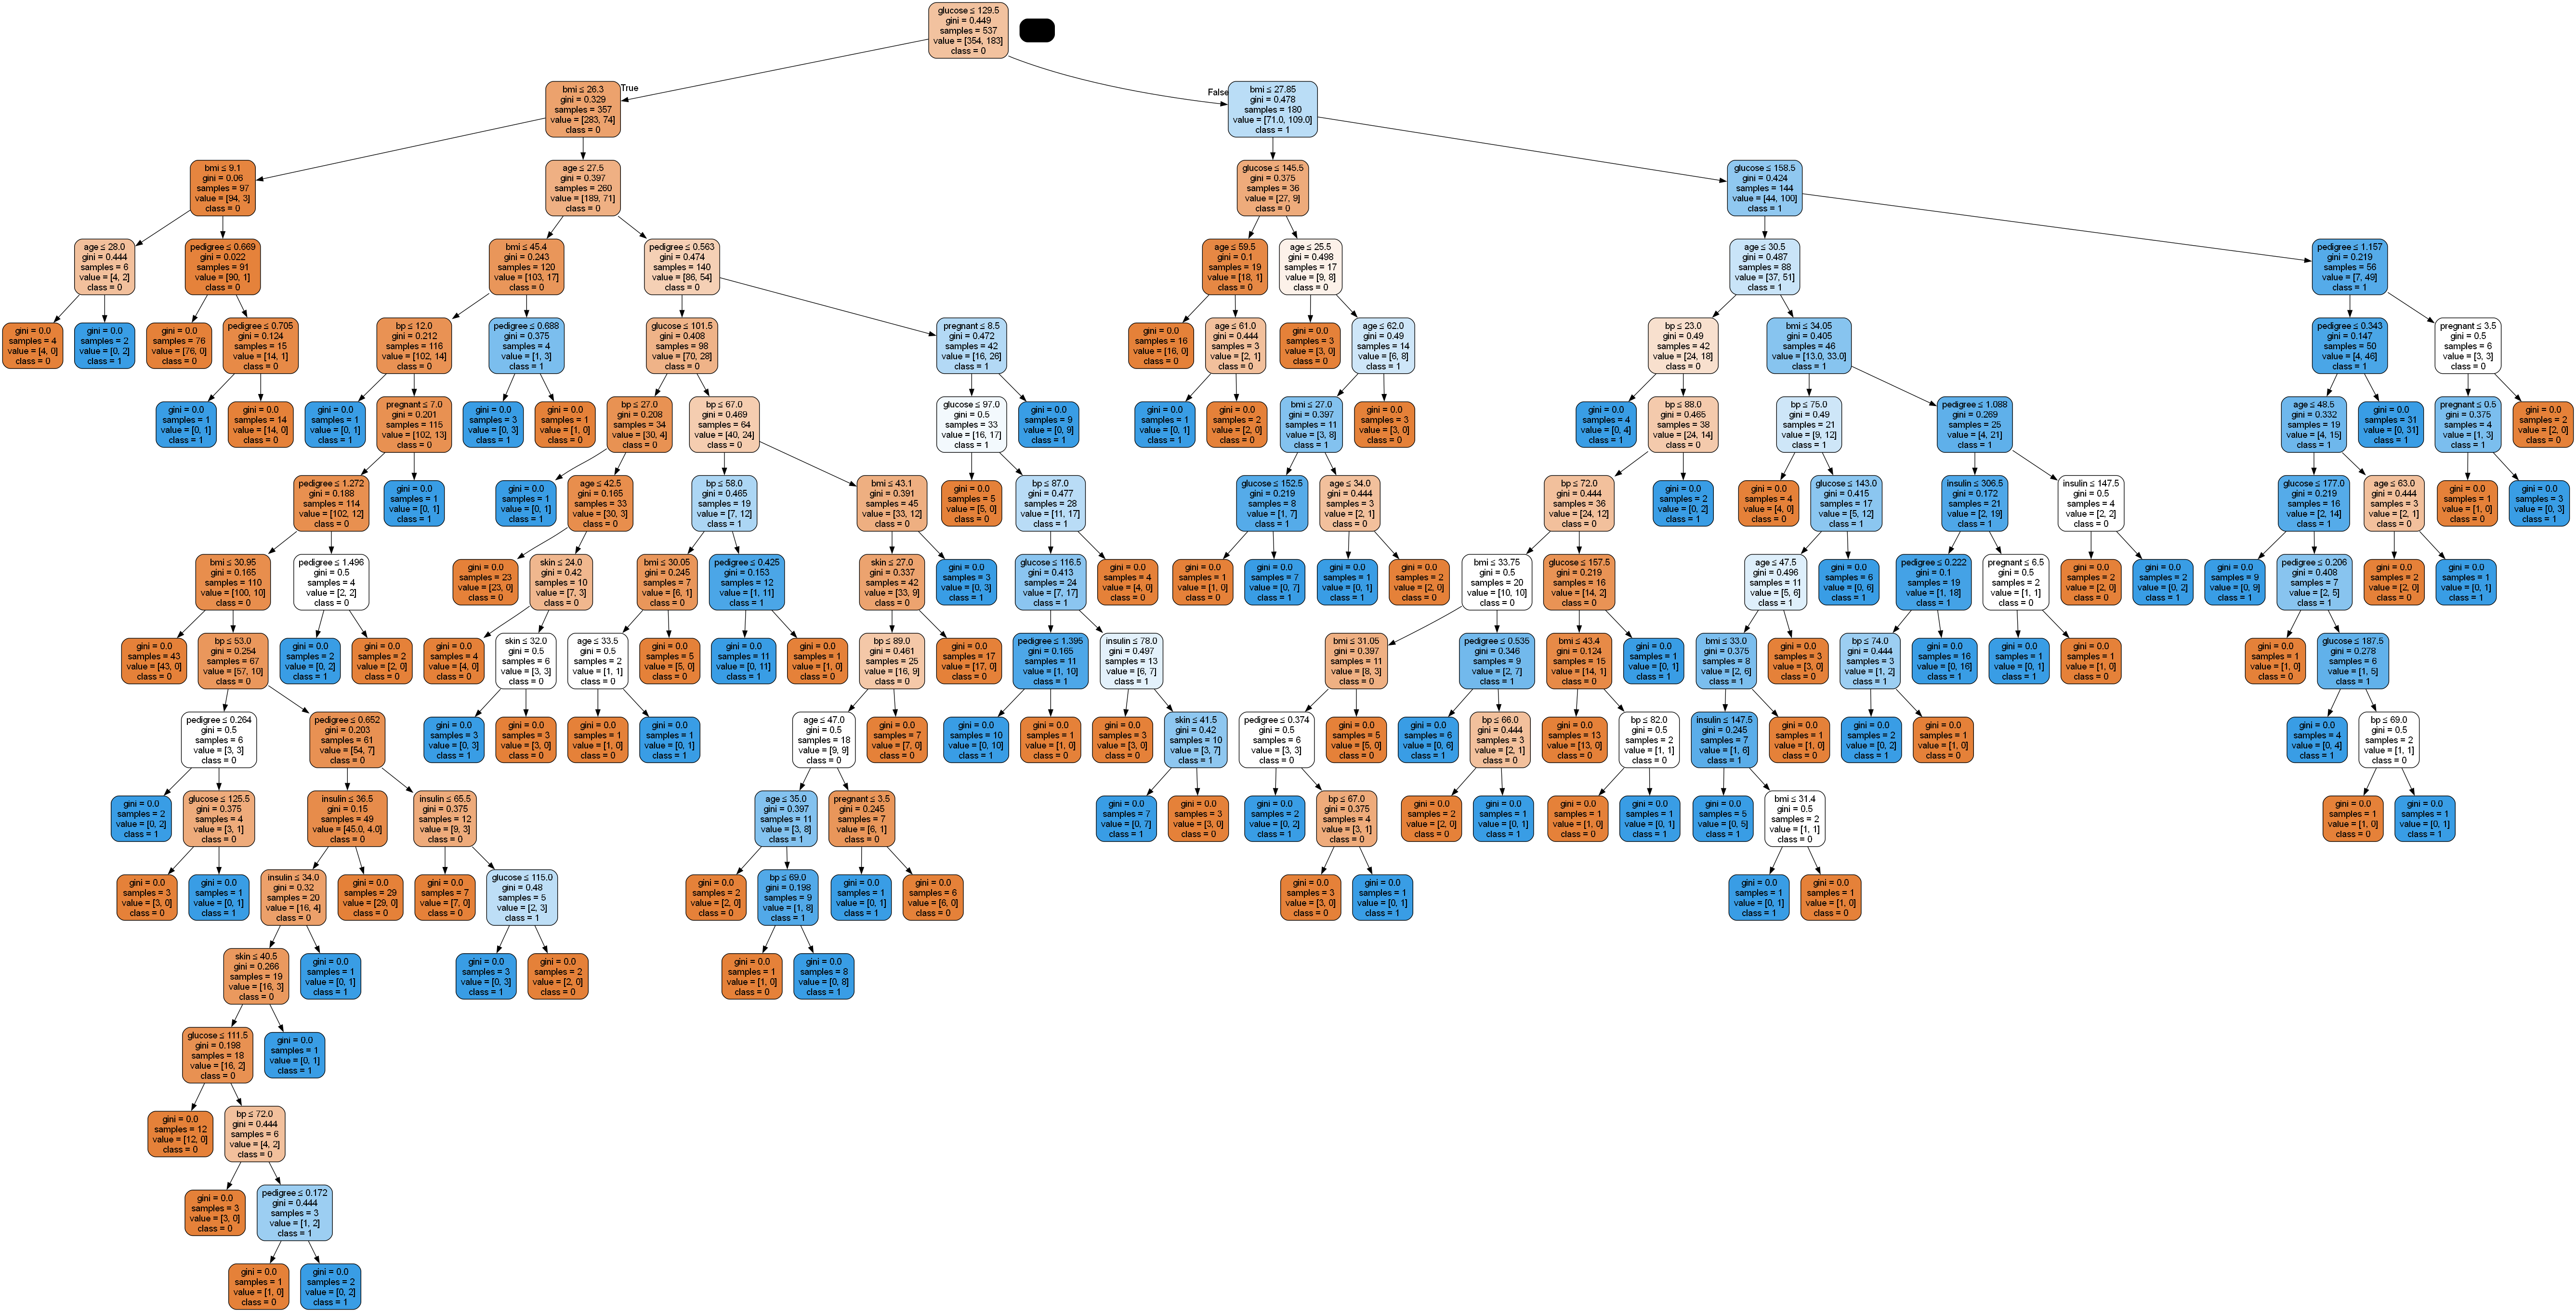

In [15]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [17]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf2.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [18]:
#Reporte de metricas
predicciones=clf2.predict(X_test).reshape(-1,1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



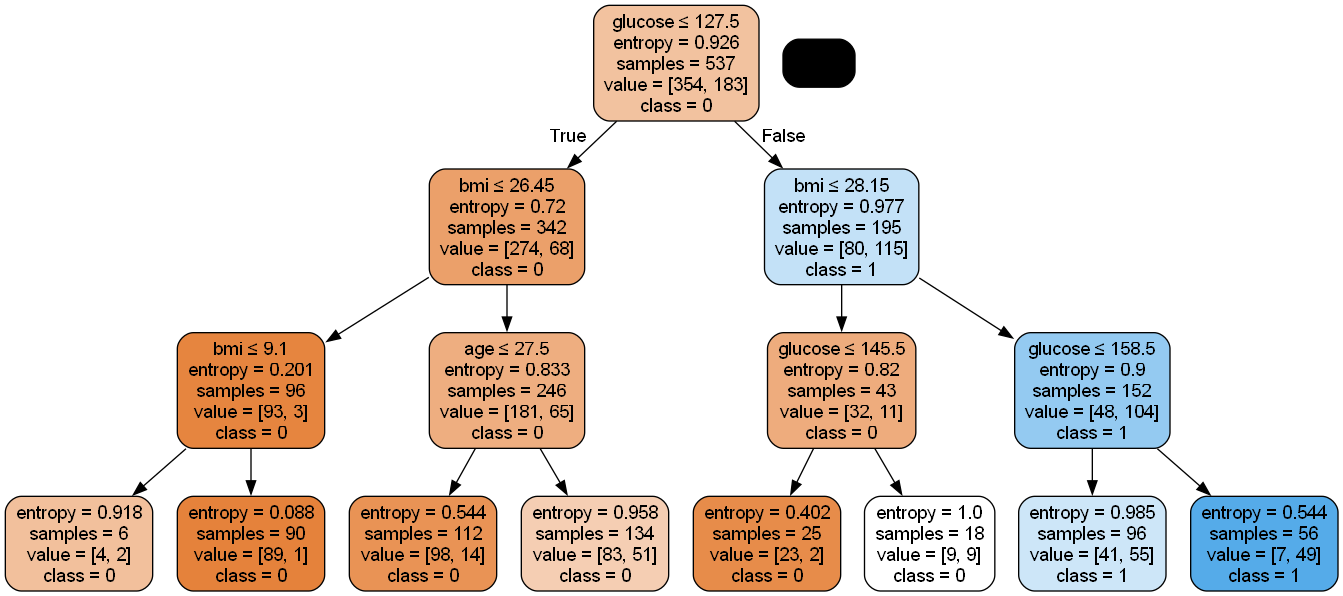

In [19]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())